- <mark> 弹性网络模型效果差 </mark>
- <mark> 遍历所有可能？ </mark>
- <mark> 是否需要进行预剪枝，使用Boosting等操作 </mark>
# import包

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# 模型

## 氨基酸网络部分

In [3]:
# 读取数据
df_AA = pd.read_csv('itasser-AAN-feature.txt', sep='\t')
df_dyn = pd.read_csv('itasser_pos_dyn.txt', sep='\t')
##### 对氨基酸网络的特征进行ML
print("------------------------------氨基酸网络------------------------------")
# 数据集切分
# 疾病数据切分
df_AA_ASD_Cancer = df_AA[df_AA['Disease'].isin(['ASD', 'Cancer'])]
df_AA_ASD_AC = df_AA[df_AA['Disease'].isin(['ASD', 'ASD_Cancer'])]
df_AA_Cancer_AC = df_AA[df_AA['Disease'].isin(['Cancer', 'ASD_Cancer'])]

# 洗牌打乱    
X_1 = df_AA_ASD_Cancer[['Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'Clustering_coefficient']]
y_1 = df_AA_ASD_Cancer['Disease']
# 切分后的数据集重新将index排序
X_1 = X_1.reset_index(drop=True)
y_1 = y_1.reset_index(drop=True)
shuffle_index = np.random.permutation(X_1.index)
X_1= X_1.iloc[shuffle_index]
y_1 = y_1.iloc[shuffle_index]

X_2 = df_AA_ASD_Cancer[['Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'Clustering_coefficient']]
y_2 = df_AA_ASD_Cancer['Disease']
X_2 = X_2.reset_index(drop=True)
y_2 = y_2.reset_index(drop=True)
shuffle_index = np.random.permutation(X_2.index)
X_2 = X_2.iloc[shuffle_index]
y_2 = y_2.iloc[shuffle_index]

X_3 = df_AA_ASD_Cancer[['Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'Clustering_coefficient']]
y_3 = df_AA_ASD_Cancer['Disease']
X_3 = X_3.reset_index(drop=True)
y_3 = y_3.reset_index(drop=True)
shuffle_index = np.random.permutation(X_3.index)
X_3 = X_3.iloc[shuffle_index]
y_3 = y_3.iloc[shuffle_index]

# 训练集测试集切分
# [806rows, 5cols]
X_train_1 = X_1[:650]
X_test_1 = X_1[650:]
y_train_1 = y_1[:650]
y_test_1 = y_1[650:]

X_train_2 = X_2[:650]
X_test_2 = X_2[650:]
y_train_2 = y_2[:650]
y_test_2 = y_2[650:]

X_train_3 = X_3[:650]
X_test_3 = X_3[650:]
y_train_3 = y_3[:650]
y_test_3 = y_3[650:]


# 模型构建
rf_clf_1 = RandomForestClassifier(n_estimators=10000, n_jobs=-1, oob_score=True)
rf_clf_2 = RandomForestClassifier(n_estimators=10000, n_jobs=-1, oob_score=True)
rf_clf_3 = RandomForestClassifier(n_estimators=10000, n_jobs=-1, oob_score=True)

rf_clf_1.fit(X_train_1, y_train_1)
rf_clf_2.fit(X_train_2, y_train_2)
rf_clf_3.fit(X_train_3, y_train_3)
score_1 = rf_clf_1.feature_importances_
score_2 = rf_clf_2.feature_importances_
score_3 = rf_clf_3.feature_importances_
print("对于ASD|Cancer重要性得分: ", end = '')
print(['Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'Clustering_coefficient'])
print(score_1)
print("对于ASD|ASD_Cancer重要性得分: ", end = '')
print(['Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'Clustering_coefficient'])
print(score_2)
print("对于Cancer|ASD_Cancer重要性得分: ", end = '')
print(['Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'Clustering_coefficient'])
print(score_3)

# 模型评估
y_pred_1 = rf_clf_1.predict(X_test_1)
y_pred_2 = rf_clf_2.predict(X_test_2)
y_pred_3 = rf_clf_3.predict(X_test_3)
print('ASD|Cancer预测准确度是: ', end='')
print(accuracy_score(y_test_1, y_pred_1))
print('ASD|ASD_Cancer预测准确度是: ', end='')
print(accuracy_score(y_test_2, y_pred_2))
print('Cancer|Control预测准确度是: ', end='')
print(accuracy_score(y_test_3, y_pred_3))

------------------------------氨基酸网络------------------------------
对于ASD|Cancer重要性得分: ['Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'Clustering_coefficient']
[0.26441185 0.08228554 0.35236641 0.17183628 0.12909993]
对于ASD|ASD_Cancer重要性得分: ['Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'Clustering_coefficient']
[0.2630309  0.08770235 0.35735096 0.16683434 0.12508145]
对于Cancer|ASD_Cancer重要性得分: ['Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'Clustering_coefficient']
[0.25380149 0.08556104 0.35690783 0.16605021 0.13767943]
ASD|Cancer预测准确度是: 0.782051282051282
ASD|ASD_Cancer预测准确度是: 0.75
Cancer|Control预测准确度是: 0.7756410256410257


## 弹性网络部分

In [4]:
####### 对弹性网络部分进行ML
print("------------------------------弹性网络部分------------------------------")
# 数据集切分
# 疾病数据切分
df_dyn_ASD_Cancer = df_dyn[df_dyn['Disease'].isin(['ASD', 'Cancer'])]
df_dyn_ASD_AC = df_dyn[df_dyn['Disease'].isin(['ASD', 'ASD_Cancer'])]
df_dyn_Cancer_AC = df_dyn[df_dyn['Disease'].isin(['Cancer', 'ASD_Cancer'])]

# 洗牌打乱    
X_4 = df_dyn_ASD_Cancer[['Effectiveness', 'Sensitivity', 'MSF', 'DFI', 'Stiffness']]
y_4 = df_dyn_ASD_Cancer['Disease']
X_4 = X_4.reset_index(drop=True)
y_4 = y_4.reset_index(drop=True)
shuffle_index = np.random.permutation(X_4.index)
X_4 = X_4.iloc[shuffle_index]
y_4 = y_4.iloc[shuffle_index]

X_5 = df_dyn_ASD_AC[['Effectiveness', 'Sensitivity', 'MSF', 'DFI', 'Stiffness']]
y_5 = df_dyn_ASD_AC['Disease']
X_5 = X_5.reset_index(drop=True)
y_5 = y_5.reset_index(drop=True)
shuffle_index = np.random.permutation(X_5.index)
X_5 = X_5.iloc[shuffle_index]
y_5 = y_5.iloc[shuffle_index]

X_6 = df_dyn_Cancer_AC[['Effectiveness', 'Sensitivity', 'MSF', 'DFI', 'Stiffness']]
y_6 = df_dyn_Cancer_AC['Disease']
X_6 = X_6.reset_index(drop=True)
y_6 = y_6.reset_index(drop=True)
shuffle_index = np.random.permutation(X_6.index)
X_6 = X_6.iloc[shuffle_index]
y_6 = y_6.iloc[shuffle_index]
# 训练集测试集切分
# [561rows, 5cols]
X_train_4 = X_4[:round(X_4.shape[0] * 0.8)]
X_test_4 = X_4[round(X_4.shape[0] * 0.8):]
y_train_4 = y_4[:round(y_4.shape[0] * 0.8)]
y_test_4 = y_4[round(y_4.shape[0] * 0.8):]

X_train_5 = X_5[:round(X_5.shape[0] * 0.8)]
X_test_5 = X_5[round(X_5.shape[0] * 0.8):]
y_train_5 = y_5[:round(y_5.shape[0] * 0.8)]
y_test_5 = y_5[round(y_5.shape[0] * 0.8):]

X_train_6 = X_6[:round(X_6.shape[0] * 0.8)]
X_test_6 = X_6[round(X_6.shape[0] * 0.8):]
y_train_6 = y_6[:round(y_6.shape[0] * 0.8)]
y_test_6 = y_6[round(y_6.shape[0] * 0.8):]


# 模型构建
rf_clf_4 = RandomForestClassifier(n_estimators=10000, n_jobs=-1, oob_score=True)
rf_clf_5 = RandomForestClassifier(n_estimators=10000, n_jobs=-1, oob_score=True)
rf_clf_6 = RandomForestClassifier(n_estimators=10000, n_jobs=-1, oob_score=True)

rf_clf_4.fit(X_train_4, y_train_4)
rf_clf_5.fit(X_train_5, y_train_5)
rf_clf_6.fit(X_train_6, y_train_6)
score_4 = rf_clf_4.feature_importances_
score_5 = rf_clf_5.feature_importances_
score_6 = rf_clf_6.feature_importances_
print("对于ASD|Cancer重要性得分: ", end = '')
print(['Effectiveness', 'Sensitivity', 'MSF', 'DFI', 'Stiffness'])
print(score_4)
print("对于ASD|ASD_Cancer重要性得分: ", end = '')
print(['Effectiveness', 'Sensitivity', 'MSF', 'DFI', 'Stiffness'])
print(score_5)
print("对于Cancer|ASD_Cancer重要性得分: ", end = '')
print(['Effectiveness', 'Sensitivity', 'MSF', 'DFI', 'Stiffness'])
print(score_6)

# 模型评估
y_pred_4 = rf_clf_4.predict(X_test_4)
y_pred_5 = rf_clf_5.predict(X_test_5)
y_pred_6 = rf_clf_6.predict(X_test_6)
print('ASD|Cancer预测准确度是: ', end='')
print(accuracy_score(y_test_4, y_pred_4))
print('ASD|ASD_Cancer预测准确度是: ', end='')
print(accuracy_score(y_test_5, y_pred_5))
print('Cancer|ASD_Cancer预测准确度是: ', end='')
print(accuracy_score(y_test_6, y_pred_6))

------------------------------弹性网络部分------------------------------
对于ASD|Cancer重要性得分: ['Effectiveness', 'Sensitivity', 'MSF', 'DFI', 'Stiffness']
[0.17600979 0.19866108 0.22651963 0.17557872 0.22323078]
对于ASD|ASD_Cancer重要性得分: ['Effectiveness', 'Sensitivity', 'MSF', 'DFI', 'Stiffness']
[0.17144653 0.22657495 0.20882814 0.17132234 0.22182804]
对于Cancer|ASD_Cancer重要性得分: ['Effectiveness', 'Sensitivity', 'MSF', 'DFI', 'Stiffness']
[0.18551883 0.20908446 0.19076666 0.19010455 0.2245255 ]
ASD|Cancer预测准确度是: 0.7410714285714286
ASD|ASD_Cancer预测准确度是: 0.6571428571428571
Cancer|ASD_Cancer预测准确度是: 0.8723404255319149


# 绘制ROC曲线

## 定义函数

In [5]:

def ROC(fpr, tpr, roc_auc, color, label):
    plt.figure()
    plt.plot(fpr, tpr, color=color, lw=2, label= label + '\n' + 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(label)
    plt.legend(loc="lower right")
    plt.show()


## 准备数据
- 注意数据需要转化成binary

In [8]:
label_encoder = LabelEncoder()
y_test_1_binary = label_encoder.fit_transform(y_test_1)
y_pred_1_binary = label_encoder.fit_transform(y_pred_1)
y_test_2_binary = label_encoder.fit_transform(y_test_2)
y_pred_2_binary = label_encoder.fit_transform(y_pred_2)
y_test_3_binary = label_encoder.fit_transform(y_test_3)
y_pred_3_binary = label_encoder.fit_transform(y_pred_3)
y_test_4_binary = label_encoder.fit_transform(y_test_4)
y_pred_4_binary = label_encoder.fit_transform(y_pred_4)
y_test_5_binary = label_encoder.fit_transform(y_test_5)
y_pred_5_binary = label_encoder.fit_transform(y_pred_5)
y_test_6_binary = label_encoder.fit_transform(y_test_6)
y_pred_6_binary = label_encoder.fit_transform(y_pred_6)

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test_1_binary, y_pred_1_binary)
roc_auc_1 = auc(fpr_1, tpr_1)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test_2_binary, y_pred_2_binary)
roc_auc_2 = auc(fpr_2, tpr_2)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test_3_binary, y_pred_3_binary)
roc_auc_3 = auc(fpr_3, tpr_3)
fpr_4, tpr_4, thresholds_4 = roc_curve(y_test_4_binary, y_pred_4_binary)
roc_auc_4 = auc(fpr_4, tpr_4)
fpr_5, tpr_5, thresholds_5 = roc_curve(y_test_5_binary, y_pred_5_binary)
roc_auc_5 = auc(fpr_5, tpr_5)
fpr_6, tpr_6, thresholds_6 = roc_curve(y_test_6_binary, y_pred_6_binary)
roc_auc_6 = auc(fpr_6, tpr_6)

## 开始画图

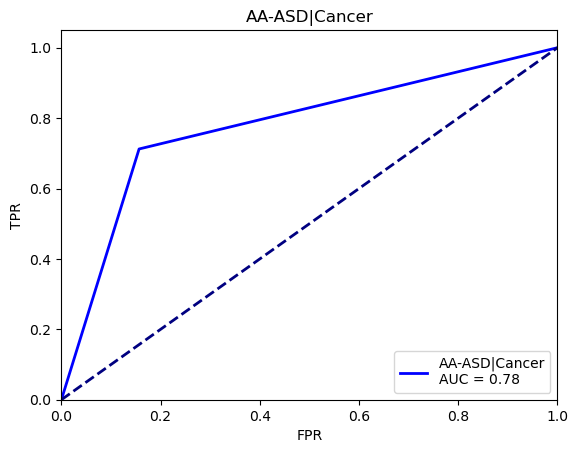

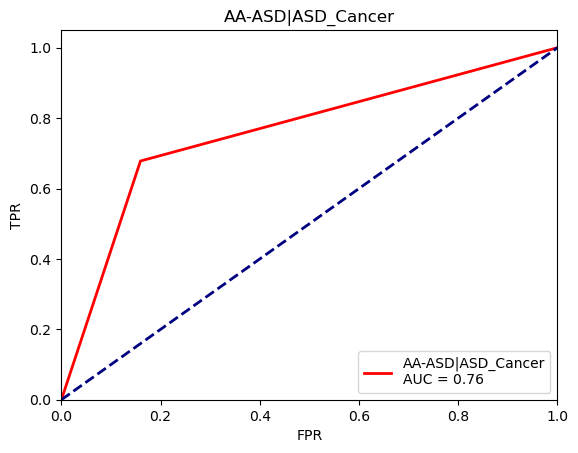

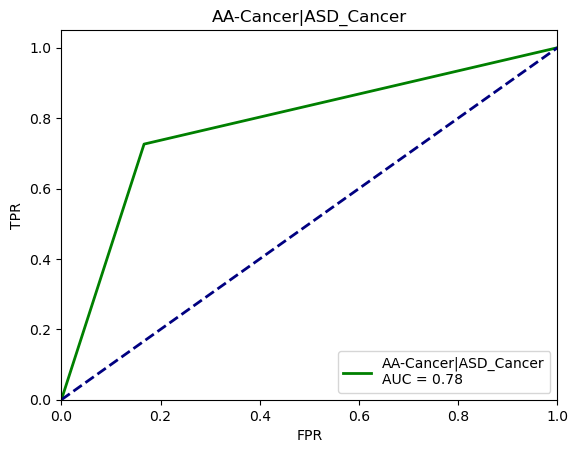

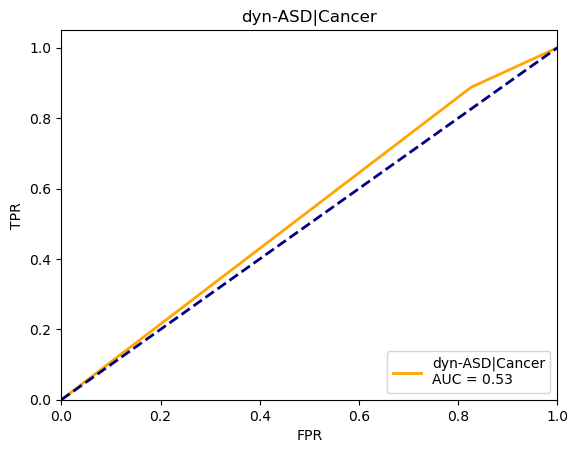

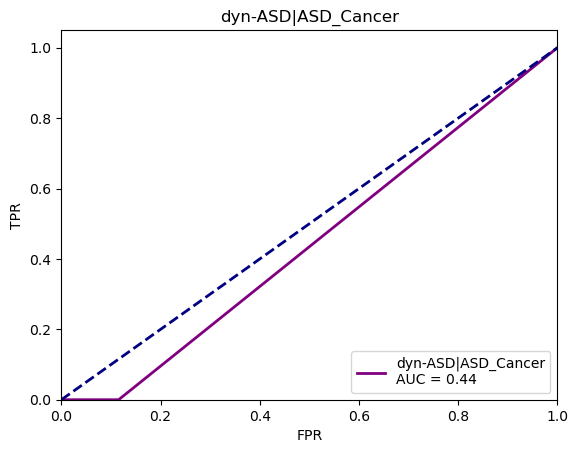

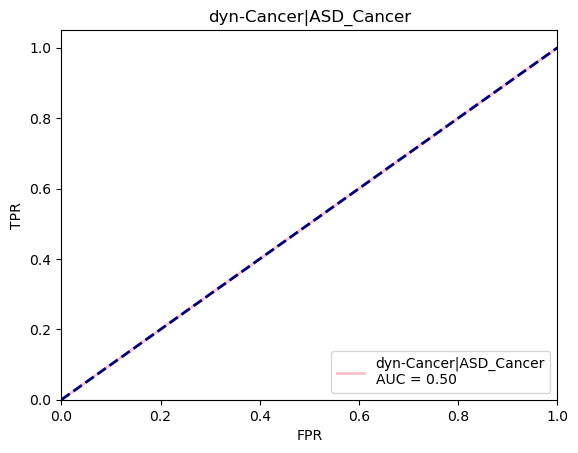

In [9]:
ROC(fpr_1, tpr_1, roc_auc_1, 'b', 'AA-ASD|Cancer')
ROC(fpr_2, tpr_2, roc_auc_2, 'r', 'AA-ASD|ASD_Cancer')
ROC(fpr_3, tpr_3, roc_auc_3, 'g', 'AA-Cancer|ASD_Cancer')
ROC(fpr_4, tpr_4, roc_auc_4, 'orange', 'dyn-ASD|Cancer')
ROC(fpr_5, tpr_5, roc_auc_5, 'purple', 'dyn-ASD|ASD_Cancer')
ROC(fpr_6, tpr_6, roc_auc_6, 'pink', 'dyn-Cancer|ASD_Cancer')

## 模型循环选择——ASD versus Cancer

In [23]:
# 生成全部的组合
import itertools
variables = ['Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'Clustering_coefficient']
all_combinations = []
# 组合
for r in range(1, len(variables)+1):
    combinations = list(itertools.combinations(variables, r))
    combinations = [list(combination) for combination in combinations]  # 转换为列表
    all_combinations.extend(combinations)


df_AA_ASD_Cancer = df_AA[df_AA['Disease'].isin(['ASD', 'Cancer'])]
df_AA_ASD_AC = df_AA[df_AA['Disease'].isin(['ASD', 'ASD_Cancer'])]
df_AA_Cancer_AC = df_AA[df_AA['Disease'].isin(['Cancer', 'ASD_Cancer'])]

for combination in all_combinations:
    print(combination)
    rf_clf_select = RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True)
    # 洗牌打乱    
    X_select = df_AA_ASD_Cancer[combination]
    y_select = df_AA_ASD_Cancer['Disease']
    # 切分后的数据集重新将index排序
    X_select = X_select.reset_index(drop=True)
    y_select = y_select.reset_index(drop=True)
    shuffle_index = np.random.permutation(X_select.index)
    X_select= X_select.iloc[shuffle_index]
    y_select = y_select.iloc[shuffle_index]
    # 切分数据集
    X_train_select = X_select[:650]
    X_test_select = X_select[650:]
    y_train_select = y_select[:650]
    y_test_select = y_select[650:]
    # 训练模型
    rf_clf_select = RandomForestClassifier(n_estimators=2000, n_jobs=-1, oob_score=True)
    rf_clf_select.fit(X_train_select, y_train_select)
    score_select = rf_clf_select.feature_importances_
    y_pred_select = rf_clf_select.predict(X_test_select)
    # 打印输出
    print("-"*20,end = '')
    print(str(combination),end = '')
    print("-"*20)
    print("*****重要性得分*****")
    print(score_select)
    print("*****模型准确性*****")
    print(accuracy_score(y_test_select, y_pred_select))



['Betweenness']
--------------------['Betweenness']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.5769230769230769
['Closeness']
--------------------['Closeness']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.48717948717948717
['Degree']
--------------------['Degree']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.8525641025641025
['Eigenvector']
--------------------['Eigenvector']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.46153846153846156
['Clustering_coefficient']
--------------------['Clustering_coefficient']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.5833333333333334
['Betweenness', 'Closeness']
--------------------['Betweenness', 'Closeness']--------------------
*****重要性得分*****
[0.73787937 0.26212063]
*****模型准确性*****
0.6089743589743589
['Betweenness', 'Degree']
--------------------['Betweenness', 'Degree']--------------------
*****重要性得分*****
[0.58449682 0.41550318]
*****模型准确性*****
0.7692307692307693
['Betweenn

In [ ]:
'''
--------------------['Betweenness', 'Closeness', 'Degree']--------------------
*****重要性得分*****
[0.32904906 0.12972206 0.54122887]
*****模型准确性*****
0.8653846153846154
['Betweenness', 'Closeness', 'Eigenvector']
'''

## 模型循环选择——ASD versus ASD_Cancer

In [25]:
# 生成全部的组合
import itertools
variables = ['Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'Clustering_coefficient']
all_combinations = []
# 组合
for r in range(1, len(variables)+1):
    combinations = list(itertools.combinations(variables, r))
    combinations = [list(combination) for combination in combinations]  # 转换为列表
    all_combinations.extend(combinations)


df_AA_ASD_Cancer = df_AA[df_AA['Disease'].isin(['ASD', 'Cancer'])]
df_AA_ASD_AC = df_AA[df_AA['Disease'].isin(['ASD', 'ASD_Cancer'])]
df_AA_Cancer_AC = df_AA[df_AA['Disease'].isin(['Cancer', 'ASD_Cancer'])]

for combination in all_combinations:
    print(combination)
    rf_clf_select = RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True)
    # 洗牌打乱    
    X_select = df_AA_ASD_AC[combination]
    y_select = df_AA_ASD_AC['Disease']
    # 切分后的数据集重新将index排序
    X_select = X_select.reset_index(drop=True)
    y_select = y_select.reset_index(drop=True)
    shuffle_index = np.random.permutation(X_select.index)
    X_select= X_select.iloc[shuffle_index]
    y_select = y_select.iloc[shuffle_index]
    # 切分数据集
    X_train_select = X_select[:650]
    X_test_select = X_select[650:]
    y_train_select = y_select[:650]
    y_test_select = y_select[650:]
    # 训练模型
    rf_clf_select = RandomForestClassifier(n_estimators=2000, n_jobs=-1, oob_score=True)
    rf_clf_select.fit(X_train_select, y_train_select)
    score_select = rf_clf_select.feature_importances_
    y_pred_select = rf_clf_select.predict(X_test_select)
    # 打印输出
    print("-"*20,end = '')
    print(str(combination),end = '')
    print("-"*20)
    print("*****重要性得分*****")
    print(score_select)
    print("*****模型准确性*****")
    print(accuracy_score(y_test_select, y_pred_select))

['Betweenness']
--------------------['Betweenness']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.5064102564102564
['Closeness']
--------------------['Closeness']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.5448717948717948
['Degree']
--------------------['Degree']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.6602564102564102
['Eigenvector']
--------------------['Eigenvector']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.4807692307692308
['Clustering_coefficient']
--------------------['Clustering_coefficient']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.5897435897435898
['Betweenness', 'Closeness']
--------------------['Betweenness', 'Closeness']--------------------
*****重要性得分*****
[0.72401602 0.27598398]
*****模型准确性*****
0.6794871794871795
['Betweenness', 'Degree']
--------------------['Betweenness', 'Degree']--------------------
*****重要性得分*****
[0.78636827 0.21363173]
*****模型准确性*****
0.5897435897435898
['Betweennes

In [ ]:
'''
--------------------['Betweenness', 'Closeness', 'Degree', 'Clustering_coefficient']--------------------
*****重要性得分*****
[0.43396504 0.07530567 0.24857774 0.24215155]
*****模型准确性*****
0.7243589743589743
'''

## 模型循环选择——Cancer versus ASD_Cancer

In [26]:
# 生成全部的组合
import itertools
variables = ['Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'Clustering_coefficient']
all_combinations = []
# 组合
for r in range(1, len(variables)+1):
    combinations = list(itertools.combinations(variables, r))
    combinations = [list(combination) for combination in combinations]  # 转换为列表
    all_combinations.extend(combinations)


df_AA_ASD_Cancer = df_AA[df_AA['Disease'].isin(['ASD', 'Cancer'])]
df_AA_ASD_AC = df_AA[df_AA['Disease'].isin(['ASD', 'ASD_Cancer'])]
df_AA_Cancer_AC = df_AA[df_AA['Disease'].isin(['Cancer', 'ASD_Cancer'])]

for combination in all_combinations:
    print(combination)
    rf_clf_select = RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True)
    # 洗牌打乱    
    X_select = df_AA_Cancer_AC[combination]
    y_select = df_AA_Cancer_AC['Disease']
    # 切分后的数据集重新将index排序
    X_select = X_select.reset_index(drop=True)
    y_select = y_select.reset_index(drop=True)
    shuffle_index = np.random.permutation(X_select.index)
    X_select= X_select.iloc[shuffle_index]
    y_select = y_select.iloc[shuffle_index]
    # 切分数据集
    X_train_select = X_select[:650]
    X_test_select = X_select[650:]
    y_train_select = y_select[:650]
    y_test_select = y_select[650:]
    # 训练模型
    rf_clf_select = RandomForestClassifier(n_estimators=2000, n_jobs=-1, oob_score=True)
    rf_clf_select.fit(X_train_select, y_train_select)
    score_select = rf_clf_select.feature_importances_
    y_pred_select = rf_clf_select.predict(X_test_select)
    # 打印输出
    print("-"*20,end = '')
    print(str(combination),end = '')
    print("-"*20)
    print("*****重要性得分*****")
    print(score_select)
    print("*****模型准确性*****")
    print(accuracy_score(y_test_select, y_pred_select))

['Betweenness']
--------------------['Betweenness']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.5576923076923077
['Closeness']
--------------------['Closeness']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.4358974358974359
['Degree']
--------------------['Degree']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.7435897435897436
['Eigenvector']
--------------------['Eigenvector']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.46153846153846156
['Clustering_coefficient']
--------------------['Clustering_coefficient']--------------------
*****重要性得分*****
[1.]
*****模型准确性*****
0.6153846153846154
['Betweenness', 'Closeness']
--------------------['Betweenness', 'Closeness']--------------------
*****重要性得分*****
[0.78467145 0.21532855]
*****模型准确性*****
0.6346153846153846
['Betweenness', 'Degree']
--------------------['Betweenness', 'Degree']--------------------
*****重要性得分*****
[0.59844716 0.40155284]
*****模型准确性*****
0.75
['Betweenness', 'Eigenvec

In [ ]:
'''
--------------------['Closeness', 'Degree', 'Clustering_coefficient']--------------------
*****重要性得分*****
[0.10676336 0.68264417 0.21059247]
*****模型准确性*****
0.8397435897435898
'''

'''
--------------------['Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'Clustering_coefficient']--------------------
*****重要性得分*****
[0.2869859  0.03576789 0.39178441 0.17067118 0.11479062]
*****模型准确性*****
0.8397435897435898
'''